In [53]:
import pandas as pd
from collections import Counter
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

In [2]:
df = pd.read_excel('./ARTIGOS-RBE-COM-RESUMO.xlsx')

In [4]:
df.head()

,N,Revista,Título do artigo,Resumo,Volume,Número,Ano,Autores,Nº de Autores,URL
0,1,Revista Brasileira de Economia,Miséria ou Abundância: Alguns Modelos de Cresc...,NaN,20,1,1966,"Kingston, Lúcia Silva",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
1,2,Revista Brasileira de Economia,Comentário sobre o Modelo Econométrico de Tint...,NaN,25,1,1971,"Fioravante, Moacyr;Naylor, Thomas H.;Monteiro,...",3,http://bibliotecadigital.fgv.br/ojs/index.php/...
2,3,Revista Brasileira de Economia,Modernização e desigualdade na agricultura bra...,NaN,43,2,1989,"Hoffmann, Rodolfo;Kassouf, Ana Lúcia",2,http://bibliotecadigital.fgv.br/ojs/index.php/...
3,4,Revista Brasileira de Economia,Optimal Insider Strategy with Law Penalties,We study the optimal continuous trading strate...,70,1,2016,"Fajardo, Jose",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
4,5,Revista Brasileira de Economia,Demands for Short-Run Assets and Liabilities i...,NaN,60,1,2006,"Silva, Evandro;Resende, Marcelo",2,http://bibliotecadigital.fgv.br/ojs/index.php/...


In [6]:
df.columns

Index(['N', 'Revista', 'Título do artigo', 'Resumo', 'Volume', 'Número', 'Ano',
       'Autores', 'Nº de Autores', 'URL'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 10 columns):
N                   1556 non-null int64
Revista             1556 non-null object
Título do artigo    1556 non-null object
Resumo              330 non-null object
Volume              1556 non-null int64
Número              1556 non-null object
Ano                 1556 non-null int64
Autores             1556 non-null object
Nº de Autores       1556 non-null int64
URL                 1556 non-null object
dtypes: int64(4), object(6)
memory usage: 121.6+ KB


In [27]:
df['texto'] = df['Título do artigo'] + " "
textos = df['texto'].sum()

In [38]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.append('-')

In [54]:
lista = textos.split()
lista = [l.strip().lower() for l in lista]
lista = [l.strip(string.punctuation) for l in lista]
lista = [l for l in lista if l not in stopwords]
texto_limpo = ' '.join(lista)
freqdist = Counter(lista)
freqdist.most_common(30)

[('brasil', 271),
 ('sobre', 141),
 ('', 133),
 ('brasileira', 96),
 ('desenvolvimento', 96),
 ('política', 87),
 ('economia', 87),
 ('econômico', 85),
 ('análise', 82),
 ('inflação', 74),
 ('brazil', 66),
 ('econômica', 59),
 ('modelo', 53),
 ('renda', 50),
 ('preços', 50),
 ('monetária', 50),
 ('crescimento', 49),
 ('teoria', 48),
 ('brasileiro', 48),
 ('brazilian', 46),
 ('mercado', 44),
 ('caso', 41),
 ('agricultura', 40),
 ('plano', 38),
 ('capital', 34),
 ('fiscal', 33),
 ('nota', 31),
 ('indústria', 31),
 ('efeitos', 29),
 ('inflation', 29)]

In [55]:
wordcloud = WordCloud().generate(texto_limpo)

(-0.5, 399.5, 199.5, -0.5)

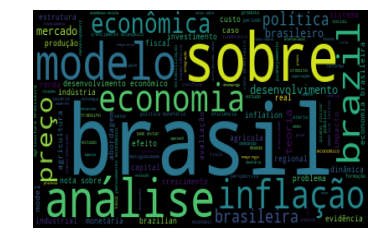

In [56]:
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

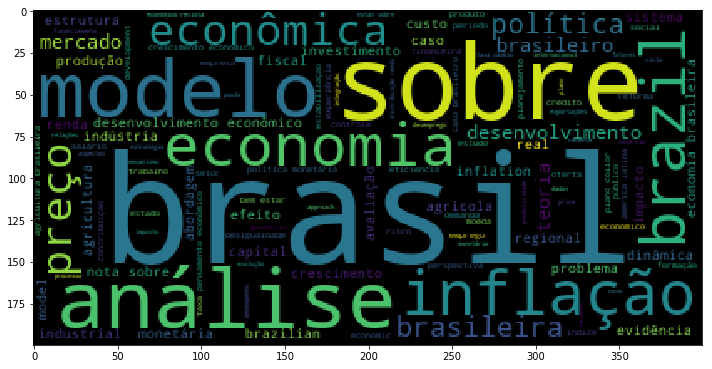

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

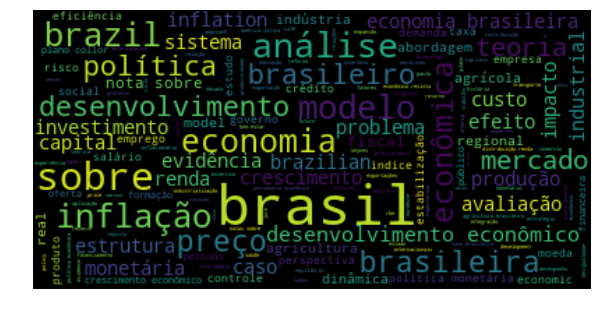

In [58]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(texto_limpo)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
# The pil way (if you don't have matplotlib)
image = wordcloud.to_image()
image.show()